In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


Make a new variable that loads the titanic dataset.

In [3]:
tdata = pd.read_csv("titanic.csv")
tdata.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Calculate the class distribution on survival on Titanic dataset.

In [4]:
class_counts = tdata.groupby('Survived').size()
#Can also do something similar with value_counts.
count2 = tdata["Survived"].value_counts()
class_counts,count2

(Survived
 0    549
 1    342
 dtype: int64,
 0    549
 1    342
 Name: Survived, dtype: int64)

Find the skewness on the dataset.

In [7]:
skew = tdata.skew()
skew

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Use the pearson data correlation between the data set.

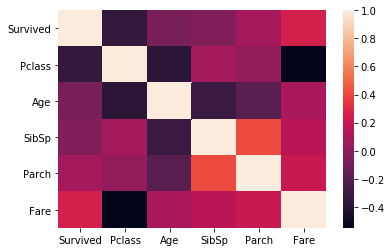

In [20]:
import seaborn as sns
correlationData = tdata.drop("PassengerId", axis=1).corr(method="pearson")
sns.heatmap(correlationData)

In [22]:
# Run a chi-squared test between Sex and Survive columns
chiData = tdata[["Sex", "Survived"]]
chiData

Sex  Survived
0      male         0
1    female         1
2    female         1
3    female         1
4      male         0
..      ...       ...
886    male         0
887  female         1
888  female         0
889    male         1
890    male         0

[891 rows x 2 columns]

In [25]:
table = pd.crosstab(chiData["Sex"], chiData["Survived"])
table

Survived    0    1
Sex               
female     81  233
male      468  109

In [43]:
from scipy.stats import chi2_contingency as cc
from scipy.stats import chi2

#Get the chi^2 stats from the contingency table
chi, p, dof, freqs = cc(table)

print("Chi^2: ", chi)
print("P value: ", p)
print("Degrees of Freedom: ", dof)
print("Expected Frequencies: \n", freqs)

Chi^2:  260.71702016732104
P value:  1.1973570627755645e-58
Degrees of Freedom:  1
Expected Frequencies: 
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [44]:
# The chi^2 PPF function 
# is the inverse cumulative distribution function,
# i.e. ppf(probability) = chi^2 value

#Get the critical value of chi^2
critVal = chi2.ppf(.95, 1)

#Compare it with the chi value we got from the contigency table.
chi, critVal


(260.71702016732104, 3.841458820694124)

We reject H0 by the Chi Squared test with a signifance level of 0.05. This tells us that sex and survival on the Titanic are not independent; "Women and children first"